In [1]:
import pandas as pd 
import matplotlib as pb
import seaborn as sns

In [5]:
data = pd.read_csv("Social_Network.csv.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### Examine the structure of the dataset


In [7]:
# Display the first rows of the dataset
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
#num of features (columns)
fnum = len(data.columns)
fnum

5

In [17]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
data.describe(
    
)

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [18]:
# value count for "purchased"
p_counts = data['Purchased'].value_counts()
p_counts

0    257
1    143
Name: Purchased, dtype: int64

In [19]:
# calculating the percentages
p_percentage = p_counts / len(data) * 100
p_percentage

0    64.25
1    35.75
Name: Purchased, dtype: float64

In [25]:
import matplotlib.pyplot as pbt

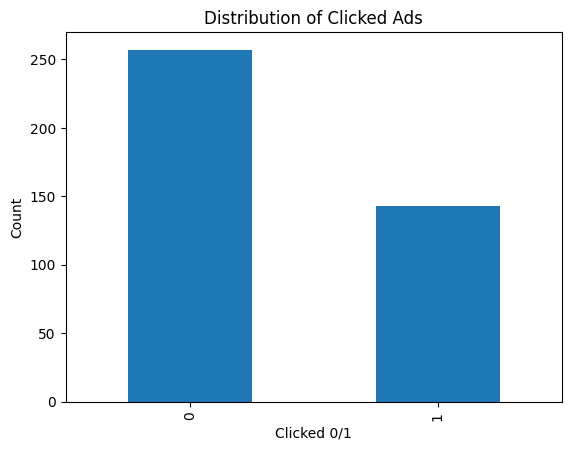

In [30]:
# bar chart of a value count 
p_counts.plot(kind='bar')
pbt.title('Distribution of Clicked Ads')
pbt.xlabel('Clicked 0/1')
pbt.ylabel('Count')
pbt.show()

### Data Preprocessing:


In [35]:
# perecentage of missing val
missing_per = (data.isnull().sum() / len(data)) * 100
missing_per

User ID            0.0
Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
features = data.drop('Purchased', axis=1)
target = data['Purchased']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 300
Testing set size: 100


### Decision Tree Model:

Decision trees are a type of machine learning algorithm commonly used for classification and regression tasks. They work by splitting data based on certain features, building a tree-like structure with nodes representing decisions and branches representing possible outcomes. Imagine it as a flowchart where each decision leads you down a specific path.

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train_scaled, y_train)

y_train_pred = dt_model.predict(X_train_scaled)

print("Accuracy on the training set:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report on the training set:\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix on the training set:\n", confusion_matrix(y_train, y_train_pred))


Accuracy on the training set: 1.0

Classification Report on the training set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00       106

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix on the training set:
 [[194   0]
 [  0 106]]


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [50]:
y_test_pred = dt_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy on the testing set:", accuracy)
print("Precision on the testing set:", precision)
print("Recall on the testing set:", recall)
print("F1-score on the testing set:", f1)


Accuracy on the testing set: 0.86
Precision on the testing set: 0.8484848484848485
Recall on the testing set: 0.7567567567567568
F1-score on the testing set: 0.8000000000000002
